# The Central Limit Theorem and the Bootstrap

## Part 0: Central Limit Theorem

The Central Limit Theorem states that the mean of a sufficiently large number of samples of independent random variables, each drawn from a distribution with a well-defined expected value and well-defined variance, will be approximately normally distributed. Most distributions meet these criteria, so the CLT applies to them. Therefore the application of CLT is ubiquitous in statistics. Here we will explore the CLT via simulation.
 
<br>

1. As we explore the CLT we will be plotting means of samples drawn from several different distributions.  In order to do this efficiently we need to pass the Scipy distribution objects ([docs here](http://docs.scipy.org/doc/scipy-0.17.1/reference/stats.html)) and their parameters to this plotting function so that we can generate the data to be plotted. Here is a function that generates draws from a distribution by calling the `.rvs()` method.  Use this code to generate data from at least the **Poisson, Binomial, Exponential, Geometric, and Uniform** distributions. 


In [46]:
import scipy.stats as stats
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

def make_draws(dist, params, size=200):
  """
  Draw samples of random variables from a specified distribution
  with given parameters and return these in an array.

  INPUT:
  dist: (Scipy.stats distribution object) Distribution with a .rvs method
  params: (dict) Parameters to define the distribution dist.
                e.g. if dist = scipy.stats.binom then params could be:
                {'n': 100, 'p': 0.25}
  size: (int) Number of samples to draw

  OUTPUT:
  (Numpy array) Sample of random variables 
  """
  return dist(**params).rvs(size) 

In [47]:
# Generate draws from the Binomial Distribution, using Scipy's binom object.  
binomial_samp = make_draws(stats.binom, {'n': 100, 'p':0.25}, size=200)

In [4]:
# Generate draws from the Binomial Distribution, using Scipy's binom object.  
poisson_samp = make_draws(stats.poisson, {'mu': 100}, size=200)

In [7]:
uniform_samp = make_draws(stats.uniform, {'loc': 5, 'scale': 1})

In [13]:
geom_samp = make_draws(stats.geom, {'p': .25})

In [17]:
expon_samp = make_draws(stats.expon, {'loc': 25})

  NOTES:
    The `**params` notation unpacks the `params` dictionary and passes the items in the dict as keyword arguments to define the Scipy distribution instance.  If this is unfamiliar, check out the [docs](https://docs.python.org/2/tutorial/controlflow.html#unpacking-argument-lists) and/or [stackoverflow](http://stackoverflow.com/questions/1179223/in-python-when-passing-arguments-what-does-before-an-argument-do).

Beware that Scipy aims for consistency in what it calls the parameters that define a distribution and this results in some discrepancies between how we have presented these distributions in class and the definitions that Scipy uses.  We already saw this with Scipy's implementation of the Gamma distribution in the individual sprint.  Another example is with the [Uniform distribution](http://docs.scipy.org/doc/scipy-0.17.1/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform): typically the distribution is parameterized by its minimum and maximum bounds, while Scipy uses `loc` and `scale` where min=`loc` and max=`loc+scale`. Take some time to scan through the documentation for each distribution you consider.

2. Now that you are comfortable drawing samples from various distributions, let's explore some behaviour of samples.  Implement a `plot_means` function that takes the same arguments as `make_draws()` but adds an extra argument `repeat` which determines the number of times to redraw a random sample of `size` from the distribution (and then plots the means). (Since `make_draws` instantiates a distribution object each time it is called and this involves quite a bit of overhead, for the sake of efficiency DO NOT just call `make_draws` from the `plot_means` function, but rather directly create the necessary functionality from scratch.) 

3. Call `plot_means()` with at least each of the following distributions: 
   - Binomial
   - Poisson 
   - Exponential
   - Geometric
   - Uniform

   Try out different parameter settings for each of the distributions, as well 
   as varying the `size` and `repeat` choices. Initial choices for the `size` 
   and `repeat` might be 200 and 5000. If the distribution of means resembles 
   a normal distribution regardless of the distribution you have specified, 
   you have demonstrated the CLT! (Failure to observe this phenomenon means 
   because of the assymetry and skew of the distribution of the data being 
   sampled more samples are needed before the CLT effect will begin to emerge!)

In [62]:
def plot_means(dist, params, size=200, repeat=5000):
    """
    Draw samples of random variables from a specified distribution
    with given parameters and return these in an array.

    INPUT:
    dist: (Scipy.stats distribution object) Distribution with a .rvs method
    params: (dict) Parameters to define the distribution dist.
                e.g. if dist = scipy.stats.binom then params could be:
                {'n': 100, 'p': 0.25}
    size: (int) Number of samples to draw

    OUTPUT:
    (Numpy array) Sample of random variables 
    """
    lst = []
    for i in range(repeat):
        sample = dist(**params).rvs(size)
        lst.append(np.mean(sample))
    fig, ax = plt.subplots(1, figsize=(10, 4))
    full = ax.hist(lst, bins=50, density=True)
    
    return full

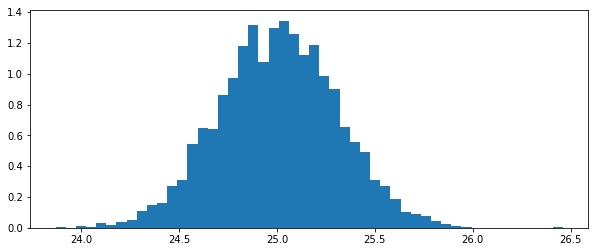

In [63]:
binomial_plot = plot_means(stats.binom, {'n': 100, 'p':0.25}, size=200)

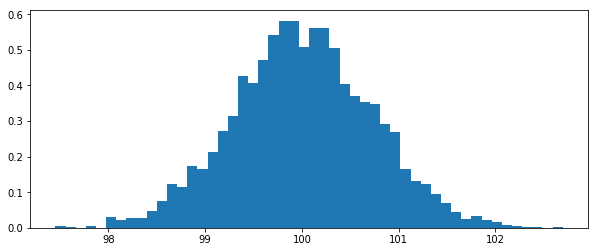

In [64]:
# Generate draws from the Binomial Distribution, using Scipy's binom object.  
poisson_plot = plot_means(stats.poisson, {'mu': 100}, size=200)

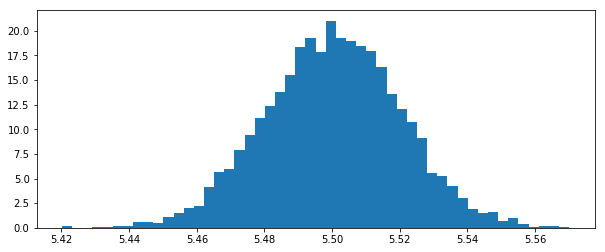

In [65]:
uniform_plot = plot_means(stats.uniform, {'loc': 5, 'scale': 1}, size=200)

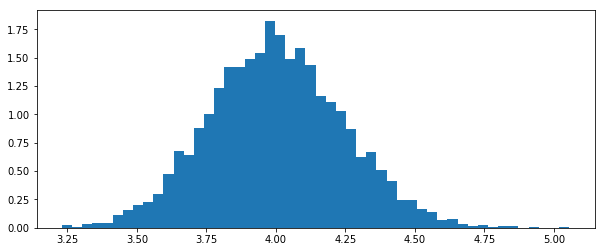

In [66]:
geom_plot = plot_means(stats.geom, {'p': .25}, size=200)

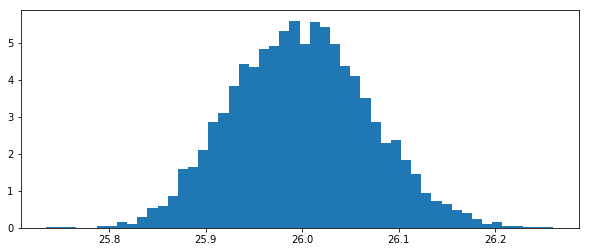

In [67]:
expon_plot = plot_means(stats.expon, {'loc': 25}, size=200)

4. What do you observe if you change the sample `size` to 10 instead of 200,
   keeping `repeat` constant at 5000? Explain your observation on a high 
   level. Should the CLT apply when your sample `size` is small with a large 
   value for `repeat`?  Hint: this is best answered by distinguishing
   between the role of the of the `size` and the `repeat` variable.

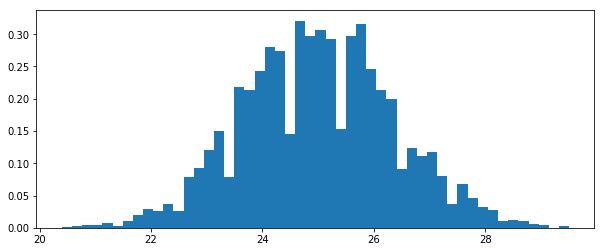

In [68]:
binomial_plot = plot_means(stats.binom, {'n': 100, 'p':0.25}, size=10)

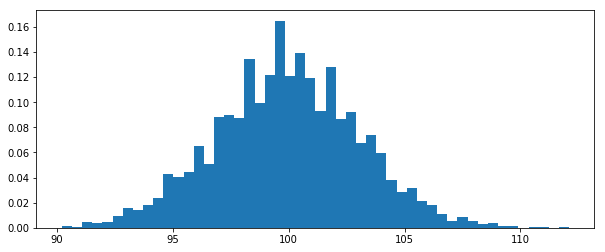

In [69]:
# Generate draws from the Binomial Distribution, using Scipy's binom object.  
poisson_plot = plot_means(stats.poisson, {'mu': 100}, size=10)

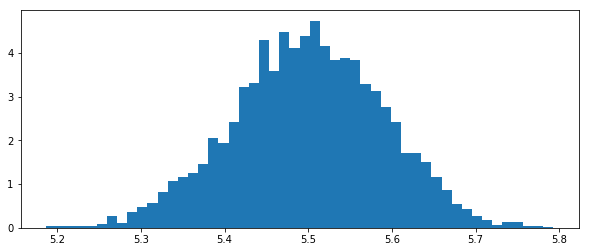

In [70]:
uniform_plot = plot_means(stats.uniform, {'loc': 5, 'scale': 1}, size=10)

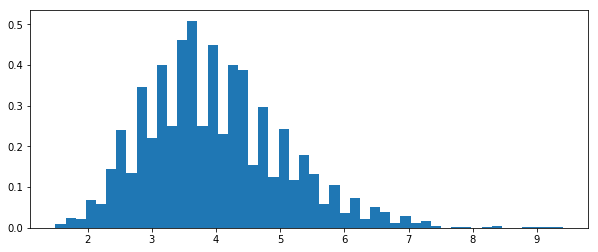

In [71]:
geom_plot = plot_means(stats.geom, {'p': .25}, size=10)

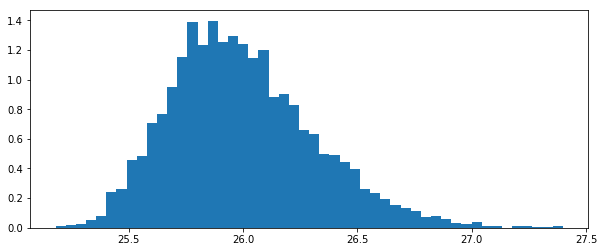

In [72]:
expon_plot = plot_means(stats.expon, {'loc': 25}, size=10)

In [73]:
# changing the size to 10 instead of 200, we see an increase in the
# standard deviation, leading to the a graph more repsentative of the 
# sample skew as opposed to a normal distribution

5. Instead of taking the mean of the samples, take the maximum of each of the 
   samples and plot the histograms again. Do they resemble the normal 
   distribution? Do all sample statistics follow a normal distribution?  In
   your answer clarify the sample statistics to which the CLT applies. 

In [75]:
def plot_means(dist, params, size=200, repeat=5000):
    """
    Draw samples of random variables from a specified distribution
    with given parameters and return these in an array.

    INPUT:
    dist: (Scipy.stats distribution object) Distribution with a .rvs method
    params: (dict) Parameters to define the distribution dist.
                e.g. if dist = scipy.stats.binom then params could be:
                {'n': 100, 'p': 0.25}
    size: (int) Number of samples to draw

    OUTPUT:
    (Numpy array) Sample of random variables 
    """
    lst = []
    for i in range(repeat):
        sample = dist(**params).rvs(size)
        lst.append(np.max(sample))
    fig, ax = plt.subplots(1, figsize=(10, 4))
    full = ax.hist(lst, bins=50, density=True)
    
    return full

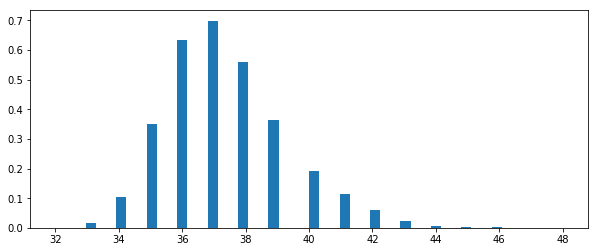

In [76]:
binomial_plot = plot_means(stats.binom, {'n': 100, 'p':0.25}, size=200)

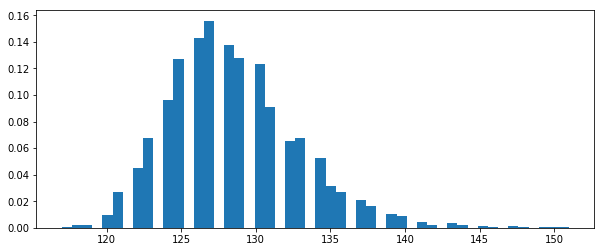

In [77]:
# Generate draws from the Binomial Distribution, using Scipy's binom object.  
poisson_plot = plot_means(stats.poisson, {'mu': 100}, size=200)

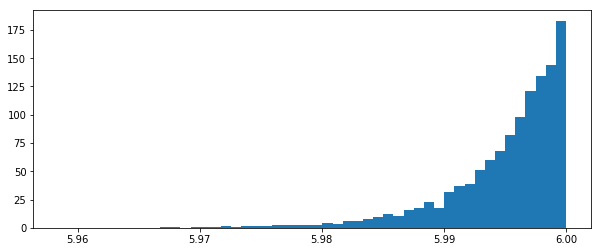

In [78]:
uniform_plot = plot_means(stats.uniform, {'loc': 5, 'scale': 1}, size=200)

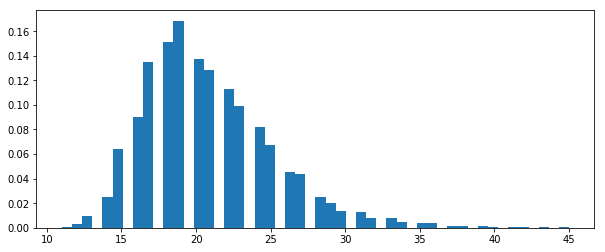

In [79]:
geom_plot = plot_means(stats.geom, {'p': .25}, size=200)

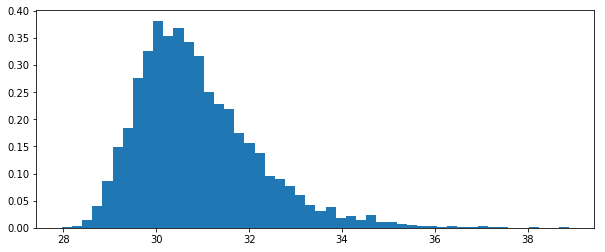

In [80]:
expon_plot = plot_means(stats.expon, {'loc': 25}, size=200)

In [82]:
# they are mostly normal, with a more stoachastic componenet, except for
# a uniform distribution

## Part 1: Population Inference and Confidence Interval


1. Suppose Google sampled 200 of its employees and measured how long they are gone for lunch. Load the data `data/lunch_hour.txt` into a Numpy ndarray and compute the mean lunch hour of the sample.


In [85]:
lunch_data = np.loadtxt('/home/asus/central-limit/data/lunch_hour.txt')

2. What is the sampling distribution of the sample mean? Justify your answer.


In [104]:
lunch_data.mean()

2.1845

In [98]:
np.var(lunch_data)

0.33330974999999996

3. Compute the [standard error](http://en.wikipedia.org/wiki/Standard_error) of the sample mean. Based on the standard error and the sample mean, compute the [95% confidence interval](http://dsearls.org/courses/M120Concepts/ClassNotes/Statistics/530G_Derivation.htm) for the population mean lunch break length.

In [103]:
# Standard error of the mean 
std_error = np.sqrt(np.var(lunch_data))/np.sqrt(len(lunch_data))

In [111]:
# 95% confidence interval 
print('95% confidence interval is [{}, {}]'.format(
    lunch_data.mean() - 2*std_error,                
    lunch_data.mean() + 2*std_error))


95% confidence interval is [2.102853230314972, 2.2661467696850277]


4. Interpret what the 95% confidence interval implies about the lunch hours of Google employees in general.


https://github.com/GalvanizeDataScience/central-limit/blob/master/assignment.md